# 데이터 전처리

In [1]:
import pandas as pd

data = pd.read_csv('data/구급활동 현황_2019_2020.csv')
print(data.head())

C:\Users\신재현\AppData\Local\Temp\ipykernel_11384\3587893059.py:3: DtypeWarning: Columns (11,12,14,15,97,98,99,100,106) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('data/구급활동 현황_2019_2020.csv')


      relif_reprt_no reg_cmptn_se_nm patnt_ocrn_type_se_nm  \
0  20194504105M00001            등록완료                    질병   
1  20194509302M00001            등록완료                   질병외   
2  20194501301M00001            등록완료                   질병외   
3  20194510105M00001            등록완료                    질병   
4  20194504106M00001            등록완료                   질병외   

  patnt_symptms_se_nm1 mjrtrma_nm hrtarst_nm crdvsc_crvsscr_se_nm  \
0                   복통        NaN        NaN                  NaN   
1                  NaN        NaN        NaN                  NaN   
2                  NaN        NaN        NaN                  NaN   
3                오심/구토        NaN        NaN                  NaN   
4                 기타통증       중증외상        NaN                  NaN   

  trnsport_acdnt_nm trnsport_acdnt_etc_nm acdnt_inj_nm  ... spt_dist2  \
0               NaN                   NaN          NaN  ...       NaN   
1               NaN                   NaN          NaN  ...       

In [2]:
# find columns with the most missing values
missing_values_count = data.isnull().sum()
missing_values_count = missing_values_count[missing_values_count > 0]
missing_values_count = missing_values_count.sort_values(ascending=True).head(10)
print(missing_values_count)

sido_nm                4
emd_se_nm              4
cty_frmvl_se_nm        4
emd_nm                 4
sigungu_nm             4
loc_info_y            10
loc_info_x            10
spt_arvl_hour      26744
spt_arvl_day       26744
spt_arvl_yr        26744
dtype: int64


In [3]:
data.dropna(thresh=len(data)-100000, axis=1, inplace=True)


In [4]:
# find columns with the most missing values
missing_values_count = data.isnull().sum()
missing_values_count = missing_values_count[missing_values_count > 0]
missing_values_count = missing_values_count.sort_values(ascending=False)
print(missing_values_count)

patnt_symptms_se_nm1    96027
patnt_occp_nm           90838
patnt_age               88833
patnt_sexdstn_se_nm     86231
patnt_contact_tm        76446
patnt_contact_min       76446
patnt_contact_day       76446
patnt_contact_mnth      76446
patnt_contact_yr        76446
patnt_contact_hour      76446
patnt_contact_ymd       76446
acdnt_ocrn_place        48360
spt_arvl_min            26744
spt_arvl_hour           26744
spt_arvl_ymd            26744
spt_arvl_day            26744
spt_arvl_mnth           26744
spt_arvl_yr             26744
spt_arvl_tm             26744
loc_info_x                 10
loc_info_y                 10
sido_nm                     4
sigungu_nm                  4
emd_nm                      4
cty_frmvl_se_nm             4
emd_se_nm                   4
dtype: int64


In [5]:
# 모델 학습을 위한 데이터 전처리
# Get the number of rows and columns in the data
num_rows, num_cols = data.shape

# Get the column names
column_names = data.columns.tolist()

# Get the data types of each column
data_types = data.dtypes

# Get the summary statistics of the numerical columns
summary_stats = data.describe()

# Print the analysis results
print("Number of rows:", num_rows)
print("Number of columns:", num_cols)
print("Column names:", column_names)
print("Data types:", data_types)
print("Summary statistics:\n", summary_stats)

Number of rows: 254881
Number of columns: 59
Column names: ['relif_reprt_no', 'reg_cmptn_se_nm', 'patnt_ocrn_type_se_nm', 'patnt_symptms_se_nm1', 'frstt_nm', 'ward_nm', 'relif_act_se_nm', 'dclr_ymd', 'dclr_tm', 'dclr_yr', 'season_se_nm', 'qu_se', 'dclr_mnth', 'dclr_day', 'dclr_hour', 'dclr_min', 'daywk', 'dsp_ymd', 'dsp_tm', 'dsp_yr', 'dsp_mnth', 'dsp_day', 'dsp_hour', 'dsp_min', 'spt_arvl_ymd', 'spt_arvl_tm', 'spt_arvl_yr', 'spt_arvl_mnth', 'spt_arvl_day', 'spt_arvl_hour', 'spt_arvl_min', 'patnt_contact_ymd', 'patnt_contact_tm', 'patnt_contact_yr', 'patnt_contact_mnth', 'patnt_contact_day', 'patnt_contact_hour', 'patnt_contact_min', 'spt_dist', 'hmg_ymd', 'hmg_tm', 'hmg_yr', 'hmg_mnth', 'hmg_day', 'hmg_hour', 'hmg_min', 'egncr_trmn_se_nm', 'patnt_age', 'patnt_sexdstn_se_nm', 'sido_nm', 'sigungu_nm', 'emd_nm', 'cty_frmvl_se_nm', 'emd_se_nm', 'loc_info_x', 'loc_info_y', 'patnt_occp_nm', 'acdnt_ocrn_place', 'trans_cl_nm']
Data types: relif_reprt_no            object
reg_cmptn_se_nm      

In [6]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelEncoder

# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the "patnt_ocrn_type_se_nm" column
# 환자발생유형구분명
data["patnt_ocrn_type_se_nm"] = label_encoder.fit_transform(data["patnt_ocrn_type_se_nm"])

# 환자증상구분명
data["patnt_symptms_se_nm1"] = label_encoder.fit_transform(data["patnt_symptms_se_nm1"])

# 이송분류명
data["trans_cl_nm"] = label_encoder.fit_transform(data["trans_cl_nm"])

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.exceptions import ConvergenceWarning
import warnings

In [8]:
# Set the warning filter to "ignore" for the specific warning
warnings.filterwarnings("ignore", category=FutureWarning)

# Rest of your code
# FILEPATH: /c:/Users/ADMIN/git/TIL/ml_basic/Project/code_read.ipynb
select_columns = data[["patnt_ocrn_type_se_nm", "patnt_symptms_se_nm1"]]
test_size = 0.2
random_state = 36

def RC(test_size, random_state):
    # Split the data into features (X) and the target variable (y)
    X = select_columns
    y = data["trans_cl_nm"]

    # Replace non-numeric values with NaN
    X = X.apply(pd.to_numeric, errors='coerce')

    # Drop rows with NaN values
    X = X.dropna()

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # Choose a machine learning algorithm
    model_rf = RandomForestClassifier()

    # Train the model
    with warnings.catch_warnings():
        warnings.filterwarnings("ignore", category=ConvergenceWarning)
        model_rf.fit(X_train, y_train)

    # Evaluate the model_rf's performance
    y_pred = model_rf.predict(X_test)
    accuracy_rf = accuracy_score(y_test, y_pred)
    print("RandomForestClassifier " + f"test_size: {test_size}, random_state: {random_state}" " - Accuracy:", accuracy_rf)

    return accuracy_rf

def LR(test_size, random_state):
    # Split the data into features (X) and the target variable (y)
    X = select_columns
    y = data["trans_cl_nm"]

    # Replace non-numeric values with NaN
    X = X.apply(pd.to_numeric, errors='coerce')

    # Drop rows with NaN values
    X = X.dropna()

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # Choose a machine learning algorithm
    model_lr = LogisticRegression()

    # Train the model
    with warnings.catch_warnings():
        warnings.filterwarnings("ignore", category=ConvergenceWarning)
        model_lr.fit(X_train, y_train)

    # Evaluate the model_lr's performance
    y_pred = model_lr.predict(X_test)
    accuracy_lr = accuracy_score(y_test, y_pred)
    print("LogisticRegression " + f"test_size: {test_size}, random_state: {random_state}" " - Accuracy:", accuracy_lr)

    return accuracy_lr


In [9]:
select_columns = data[["patnt_ocrn_type_se_nm", "patnt_symptms_se_nm1"]]

test_sizes = [0.2, 0.4]
random_states = [25, 36, 42, 52]

accuracy_scores_rf = []
accuracy_scores_lr = []
test_size_results = []
random_state_results = []

for test_size in test_sizes:
    for random_state in random_states:
        accuracy_rf = RC(test_size, random_state)
        accuracy_lr = LR(test_size, random_state)
        accuracy_scores_rf.append(accuracy_rf)
        accuracy_scores_lr.append(accuracy_lr)
        test_size_results.append(test_size)
        random_state_results.append(random_state)

RandomForestClassifier test_size: 0.2, random_state: 25 - Accuracy: 0.827196578849285
LogisticRegression test_size: 0.2, random_state: 25 - Accuracy: 0.7900818015967985
RandomForestClassifier test_size: 0.2, random_state: 36 - Accuracy: 0.8285108970712282
LogisticRegression test_size: 0.2, random_state: 36 - Accuracy: 0.7935147223257547
RandomForestClassifier test_size: 0.2, random_state: 42 - Accuracy: 0.8263726778743354
LogisticRegression test_size: 0.2, random_state: 42 - Accuracy: 0.7919061537556152
RandomForestClassifier test_size: 0.2, random_state: 52 - Accuracy: 0.8255880102791455
LogisticRegression test_size: 0.2, random_state: 52 - Accuracy: 0.7891402004825706
RandomForestClassifier test_size: 0.4, random_state: 25 - Accuracy: 0.8275577962394437
LogisticRegression test_size: 0.4, random_state: 25 - Accuracy: 0.7916785185330495
RandomForestClassifier test_size: 0.4, random_state: 36 - Accuracy: 0.8283718968544329
LogisticRegression test_size: 0.4, random_state: 36 - Accuracy: 

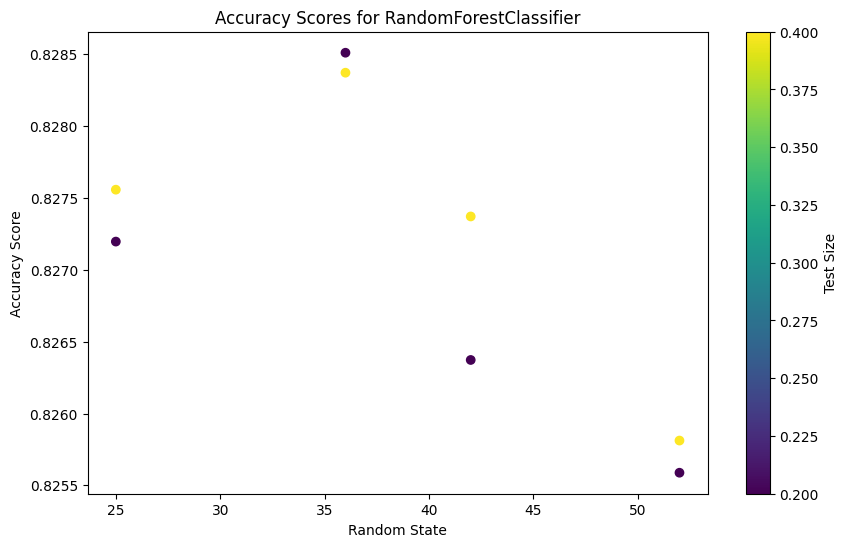

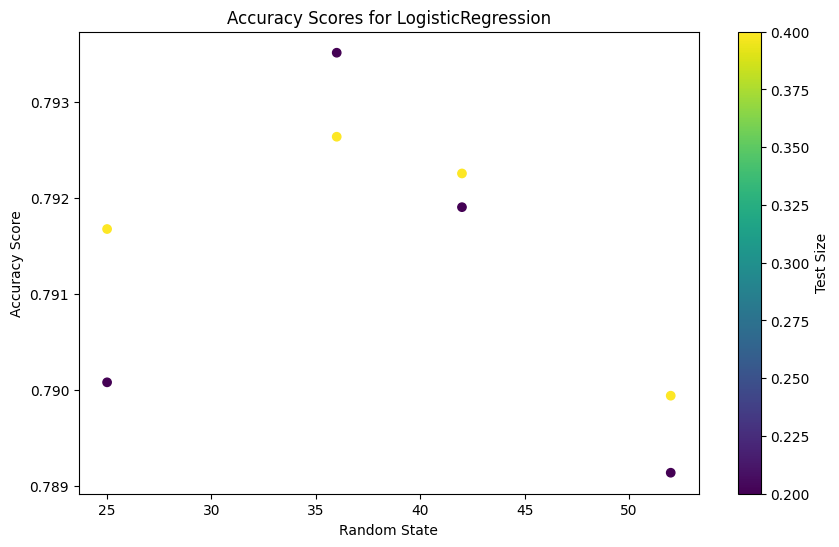

In [10]:
import matplotlib.pyplot as plt

# Plotting accuracy scores for RandomForestClassifier
plt.figure(figsize=(10, 6))
plt.scatter(random_state_results, accuracy_scores_rf, c=test_size_results, cmap='viridis')
plt.colorbar(label='Test Size')
plt.xlabel('Random State')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for RandomForestClassifier')
plt.show()

# Plotting accuracy scores for LogisticRegression
plt.figure(figsize=(10, 6))
plt.scatter(random_state_results, accuracy_scores_lr, c=test_size_results, cmap='viridis')
plt.colorbar(label='Test Size')
plt.xlabel('Random State')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for LogisticRegression')
plt.show()


In [16]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

select_columns = data[["patnt_ocrn_type_se_nm", "patnt_symptms_se_nm1"]]
test_size = 0.2
random_state = 36

X = select_columns
y = data["trans_cl_nm"]

# Replace non-numeric values with NaN
X = X.apply(pd.to_numeric, errors='coerce')

# Drop rows with NaN values
X = X.dropna()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

# Choose a machine learning algorithm
model_rf = RandomForestClassifier()

# Train the model
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=ConvergenceWarning)
    model_rf.fit(X_train, y_train)

# Evaluate the model_rf's performance
y_pred = model_rf.predict(X_test)
# Calculate the predicted probabilities
y_pred_proba = model_rf.predict_proba(X_test)[:, 1]

# Calculate the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Plot the ROC curve
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')

# Calculate the AUC score
auc_score = roc_auc_score(y_test, y_pred_proba)
plt.text(0.6, 0.2, f'AUC = {auc_score:.2f}', fontsize=12)

# Show the plot
plt.show()



ValueError: multiclass format is not supported